In [2]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 6.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
df = pd.read_csv('unemployment_rate_us_fred.csv', header=0)

In [5]:
# 경기 침체 전 --> Epoch : 0
# 경기 침체 후 --> Epoch : 1

In [7]:
df.head(3)

,DATE,Time_Period,UNRATE,Epoch
0,01-01-02,1,5.7,0
1,01-02-02,2,5.7,0
2,01-03-02,3,5.7,0


In [8]:
# construct regression expression in Patsy
reg_exp = 'UNRATE ~ Time_Period + Epoch'

# building OLS model

In [9]:
regdis_model = smf.ols(formula=reg_exp, data=df)

# Train

In [10]:
regdis_model_results = regdis_model.fit()
print(regdis_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          1.09e-111
Time:                        16:09:55   Log-Likelihood:                -146.31
No. Observations:                 200   AIC:                             298.6
Df Residuals:                     197   BIC:                             308.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1887      0.072     99.426      

<img src='https://miro.medium.com/max/1400/1*dclrJJ8hMvFp-gkPMDdG-g.png'>

# Analyzing model performance

- adjusted R-squared : model explain 92.5% of variance in the unemployment rate 

- F-statistic : F-statistic has been calculated for us and it’s value is 1220 with a p value of 1.09E-111
- The F-test’s output indicates that, at a p of < .001, the model’s coefficients are jointly significant, meaning
- We see that the estimates of all three coefficients are significant at a p value of < .001.
---
- Great Recession of 2008–2009 has caused a mean increase in unemployment in the US
  by 6.3757% with a fairly tight 95% confidence interval that ranges from 6.111% to 6.641%.

# Analysis of residuals


<img src = 'https://miro.medium.com/max/1400/1*_rqyzpQBC88KScKtG9TNXw.png'>

- Jarque-Bera and Omnibus tests of normality of residual errors reported by statsmodels:

- p-values of both tests are comfortably above .05 
- validating the the default hypothesis of the tests that the residual errors are normally distributed
- we can rely upon the confidence interval estimates reported by the model

- Durbin-Watson test’s statistic comes out at < 2.0
- positive auto-correlation among the residual errors

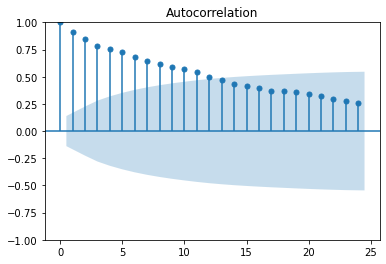

In [13]:
tsa.plot_acf(regdis_model_results.resid)
plt.show()

- The plot shows a strong auto-correlation at LAG-1
    - each value in the time series of residual errors is correlated with the value that immediately precedes it in the time series.
    
- Since values at LAG 1 and LAG 2 are correlated, and LAG 2 and LAG 3 are similarly correlated
    - LAG 1 and LAG 3 are also correlated but to a lesser extent
### . Thus we see a gently sloping curve of correlations at the other lags also.

- A strong auto-correlation of this type in the residuals implies that our model is missing one of more key explanatory variables
-  Or, the entire functional form of our model may need to be revisited.